<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Shrinkage_Methods/loss_function_surface_for_ridge_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import ticker, cm

# Create some data with 2 features

In [2]:
n = 10
m = 2

X_1 = np.random.randn(n) + 1
a = 0.99
b = np.sqrt(1 - a**2)
X_2 = a*X_1 + b*np.random.randn(n) + 2
X = np.column_stack((X_1,X_2))

ep = 0.1

true_beta1 = 2
true_beta2 = 3

Y = true_beta1*X_1 + true_beta2*X_2 + ep*np.random.randn(n)

#Optimal Beta as a function of regularization parameter

In [3]:
r_min, r_max = -1,4
reg_grid = 10**np.linspace(r_min,r_max,100)
Id = np.eye(2)

emp_cov = X.T @ X

reg_betas = np.linalg.inv(emp_cov[np.newaxis,:,:] + reg_grid[:,np.newaxis,np.newaxis]*Id )@X.T@Y

Text(0, 0.5, 'weights')

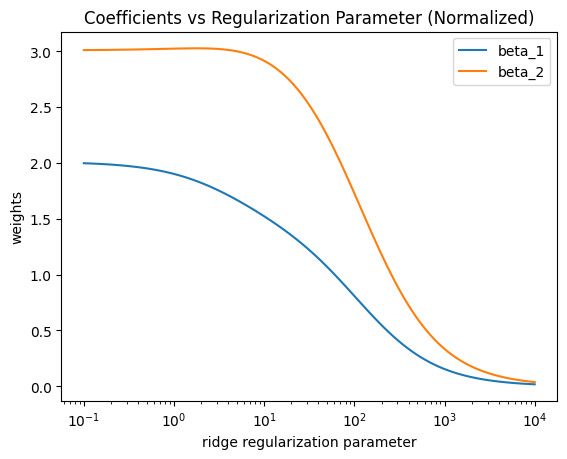

In [4]:
ax = plt.gca()
ax.plot(reg_grid, reg_betas)
ax.set_xscale('log')
ax.legend(['beta_1','beta_2'])

plt.title("Coefficients vs Regularization Parameter (Normalized)")
plt.axis('tight')
plt.xlabel('ridge regularization parameter')
plt.ylabel('weights')

<ipython-input-5-d5c5b26c8e03>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('gist_rainbow')


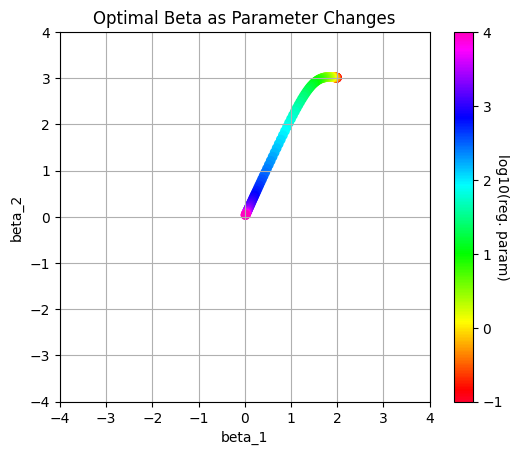

In [5]:

fig,ax=plt.subplots(1,1)
ax.set_aspect('equal', 'box')

cm = plt.cm.get_cmap('gist_rainbow')
scatter_plt = ax.scatter(reg_betas[:,0],reg_betas[:,1],vmin=r_min, vmax=r_max, c=np.log10(reg_grid),cmap=cm)
cbar = fig.colorbar(scatter_plt)
cbar.set_label('log10(reg. param)', rotation=270)

ax.grid()
ax.set_title('Optimal Beta as Parameter Changes')
ax.set_xlabel('beta_1')
ax.set_ylabel('beta_2')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
plt.show()


# MSE error plots

<ipython-input-6-05486ca64530>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


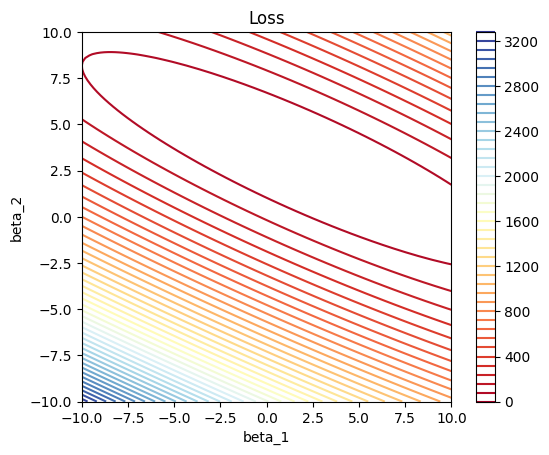

In [6]:
def make_betas(n_grid):
  grid_scale = 10
  beta1_axis = np.linspace(-grid_scale, +grid_scale, n_grid)
  beta2_axis = np.linspace(-grid_scale, +grid_scale, n_grid)
  beta1, beta2 = np.meshgrid(beta1_axis, beta2_axis)

  #shape (n_examples,n_grid,n_grid) with f(X,beta) for all the values of X and beta
  return beta1,beta2

def plot_loss_surface(L2_reg_param=0):
  beta1,beta2 = make_betas(100)
  betas = np.stack((beta1,beta2)) #shape (2,n_grid,n_grid)
  f_Xbetas = np.einsum('ia,ajk->ijk',X,betas)

  #shape (n_grid,n_grid)
  MSE = (1/n)*np.sum( (f_Xbetas - Y[:,np.newaxis,np.newaxis])**2 ,axis=0)

  loss = MSE + L2_reg_param*(beta1**2 + beta2**2)

  fig,ax=plt.subplots(1,1)
  ax.set_aspect('equal', 'box')
  cm = plt.cm.get_cmap('RdYlBu')
  cp = ax.contour(beta1, beta2, loss,50,cmap=cm)
  fig.colorbar(cp) # Add a colorbar to a plot
  ax.set_title('Loss')
  ax.set_xlabel('beta_1')
  ax.set_ylabel('beta_2')




  ax.plot()

  plt.show()


plot_loss_surface()

Eigenvectors shown in red
Eigenvalues: [  4.64628507 114.72376013]


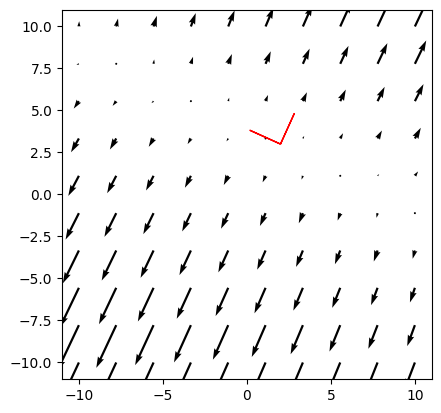

In [7]:
def plot_loss_grad(L2_reg_param=0):
  beta1,beta2 = make_betas(10)
  betas = np.stack((beta1,beta2)) #shape (2,n_grid,n_grid)
  f_Xbetas = np.einsum('ia,ajk->ijk',X,betas)
  MSE_grad = (2/n)*np.einsum('ia,ajk->ijk',X.T,f_Xbetas - Y[:,np.newaxis,np.newaxis])
  u = MSE_grad[0,:,:] + 2*L2_reg_param*beta1
  v = MSE_grad[1,:,:] + 2*L2_reg_param*beta2


  fig,ax=plt.subplots(1,1)
  ax.set_aspect('equal', 'box')

  ax.quiver(beta1,beta2,u,v)

  lambdas, eigs = np.linalg.eigh(X.T @ X + L2_reg_param * np.eye(2))
  eig0 = eigs[:,0]
  eig1 = eigs[:,1]

  arrow_len = 2
  ax.arrow(true_beta1,true_beta2,arrow_len*eig0[0],arrow_len*eig0[1],color='r')
  ax.arrow(true_beta1,true_beta2,arrow_len*eig1[0],arrow_len*eig1[1],color='r')
  #fig.title("Gradient of MSE")
  print(f"Eigenvectors shown in red")
  print(f"Eigenvalues: {lambdas}")
  plt.show()

plot_loss_grad()

# Ridge regression plots

<ipython-input-6-05486ca64530>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


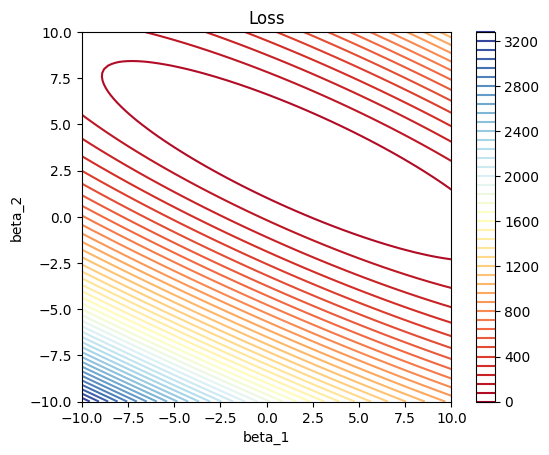

---L2 regularization parameter = 0.1---


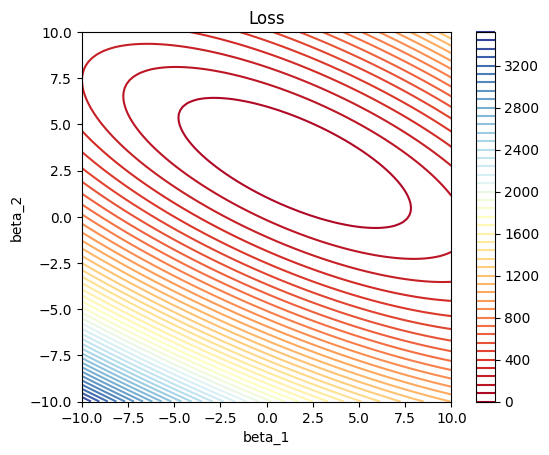

---L2 regularization parameter = 1---


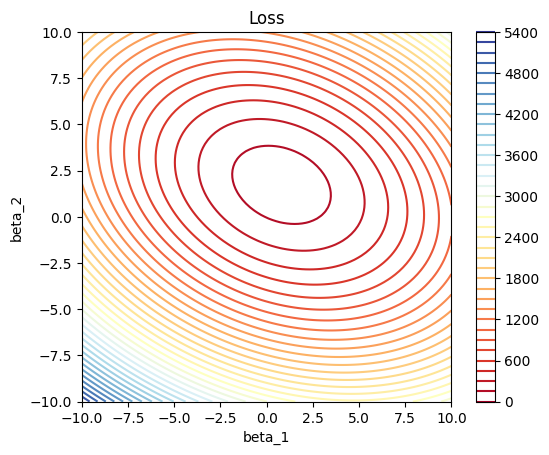

---L2 regularization parameter = 10---


In [8]:
for L2_reg in [0.1,1,10]:
  plot_loss_surface(L2_reg_param=L2_reg)
  print(f"---L2 regularization parameter = {L2_reg}---")

Eigenvectors shown in red
Eigenvalues: [  2.31406407 124.36366308]


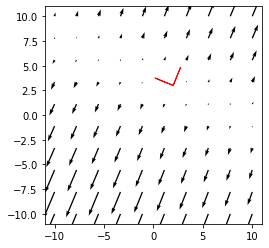

---L2 regularization parameter = 0.1---
Eigenvectors shown in red
Eigenvalues: [  3.21406407 125.26366308]


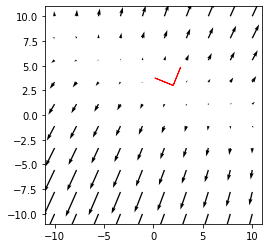

---L2 regularization parameter = 1---
Eigenvectors shown in red
Eigenvalues: [ 12.21406407 134.26366308]


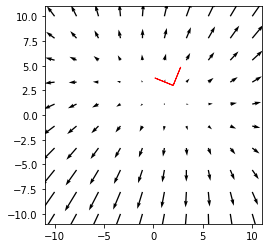

---L2 regularization parameter = 10---


In [ ]:
for L2_reg in [0.1,1,10]:
  plot_loss_grad(L2_reg_param=L2_reg)
  print(f"---L2 regularization parameter = {L2_reg}---")

# Extra functions

In [ ]:
#Tests and helper functions

def f(x,beta):
  return x @ beta

test_beta = np.array([[2],[3]])
test_x = np.array([[5,8]])

test_fx = f(test_x,test_beta)
print(test_fx)

all_fXs = f(X,test_beta)
print(all_fXs)

def MSE(beta):
  #Uses the global X,Y variables to compute the MSE
  return 1/n * np.sum( (f(X,beta) - Y)**2 )

test_beta = np.array([[2],[3]])
MSE(test_beta)

[[34]]
[[15.05115906]
 [ 9.92700591]
 [ 7.74242716]
 [11.04177583]
 [11.96923916]
 [19.90638317]
 [ 8.13107914]
 [11.62791143]
 [ 9.51565999]
 [14.61963193]]


252.58470688771627